In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from baseline import *
from viz import *
from dataset import *
from data import *

In [4]:
from baseline import get_baseline_model

In [5]:
df = load_tload('data/buildings/datasets/2024/GATES_zone-tloads.csv')
weather = load_weather('data/buildings/datasets/2024/weather.csv')

In [6]:
df

,VAV 2-119-C,VAV 3-481-B,VAV 3-292-A,VAV 2-203-B,VAV 2-213-A,VAV 2-456,VAV 2-101,VAV 3-265,VAV 3-463,VAV 2-302-A,...,VAV 1-152,VAV 3-368,VAV 3-471A,VAV 3-284A,VAV 2-314-B,VAV 1-B29-A,VAV 2-312,VAV 3-494-B,VAV 3-190,VAV 1-326-B
Date,,,,,,,,,,,,,,,,,,,,,
2024-04-29 00:00:00,0.0,0.000000,0.0,-0.080363,21.716727,-100.0,0.0,0.0,0.000000,-27.363347,...,0.0,-7.844847,25.083120,0.0,0.000000,0.0,-0.000087,0.0,0.000000,0.0
2024-04-29 00:15:00,0.0,0.000000,0.0,0.000000,21.305526,-100.0,0.0,0.0,0.000000,-27.177700,...,0.0,-18.797913,24.346260,0.0,-0.004527,0.0,-0.103134,0.0,0.000000,0.0
2024-04-29 00:30:00,0.0,0.000000,0.0,-0.032965,20.718533,-100.0,0.0,0.0,0.000000,-23.230813,...,0.0,-33.046960,24.357854,0.0,-0.036830,0.0,0.000000,0.0,0.000000,0.0
2024-04-29 00:45:00,0.0,-0.429150,0.0,-0.132193,21.717753,-100.0,0.0,0.0,0.000000,-16.897853,...,0.0,-46.632667,23.718133,0.0,-0.310716,0.0,-0.180818,0.0,0.000000,0.0
2024-04-29 01:00:00,0.0,-12.254973,0.0,-0.046001,21.137533,-100.0,0.0,0.0,0.000000,-15.825013,...,0.0,-51.075733,23.443467,0.0,-0.199145,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-19 22:45:00,0.0,0.000000,0.0,0.000000,33.663464,0.0,0.0,0.0,-15.532067,0.000000,...,0.0,0.000000,19.562360,0.0,0.000000,0.0,0.000000,0.0,-30.114414,0.0
2024-09-19 23:00:00,0.0,0.000000,0.0,0.000000,30.990500,0.0,0.0,0.0,-15.429220,0.000000,...,0.0,0.000000,17.557060,0.0,0.000000,0.0,0.000000,0.0,-22.473229,0.0
2024-09-19 23:15:00,0.0,0.000000,0.0,0.000000,55.269086,0.0,0.0,0.0,-12.843913,0.000000,...,0.0,0.000000,22.725287,0.0,0.000000,0.0,0.000000,0.0,-18.859227,0.0


In [7]:
import pandas as pd
import numpy as np

def add_temporal_features(dataframe):
    dataframe = dataframe.copy()
    
    # Convert the DatetimeIndex to a Series to use the dt accessor
    datetime_series = dataframe.index.to_series()
    
    # Add cyclic encoding for hour of the day
    dataframe['hour_sin'] = np.sin(2 * np.pi * datetime_series.dt.hour / 24)
    dataframe['hour_cos'] = np.cos(2 * np.pi * datetime_series.dt.hour / 24)
    
    return dataframe

# Adding temporal features to weather data
weather = add_temporal_features(weather)


In [8]:
df.dropna(inplace=True)

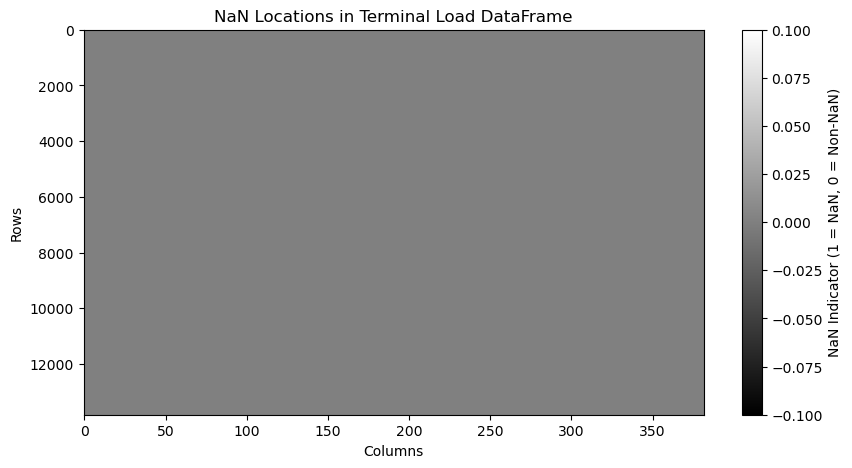

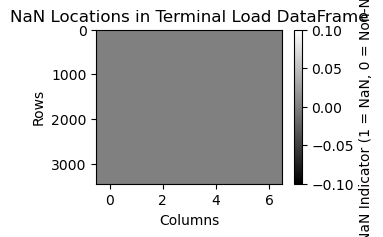

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
nan_viz(df, wide = True)
nan_viz(weather)

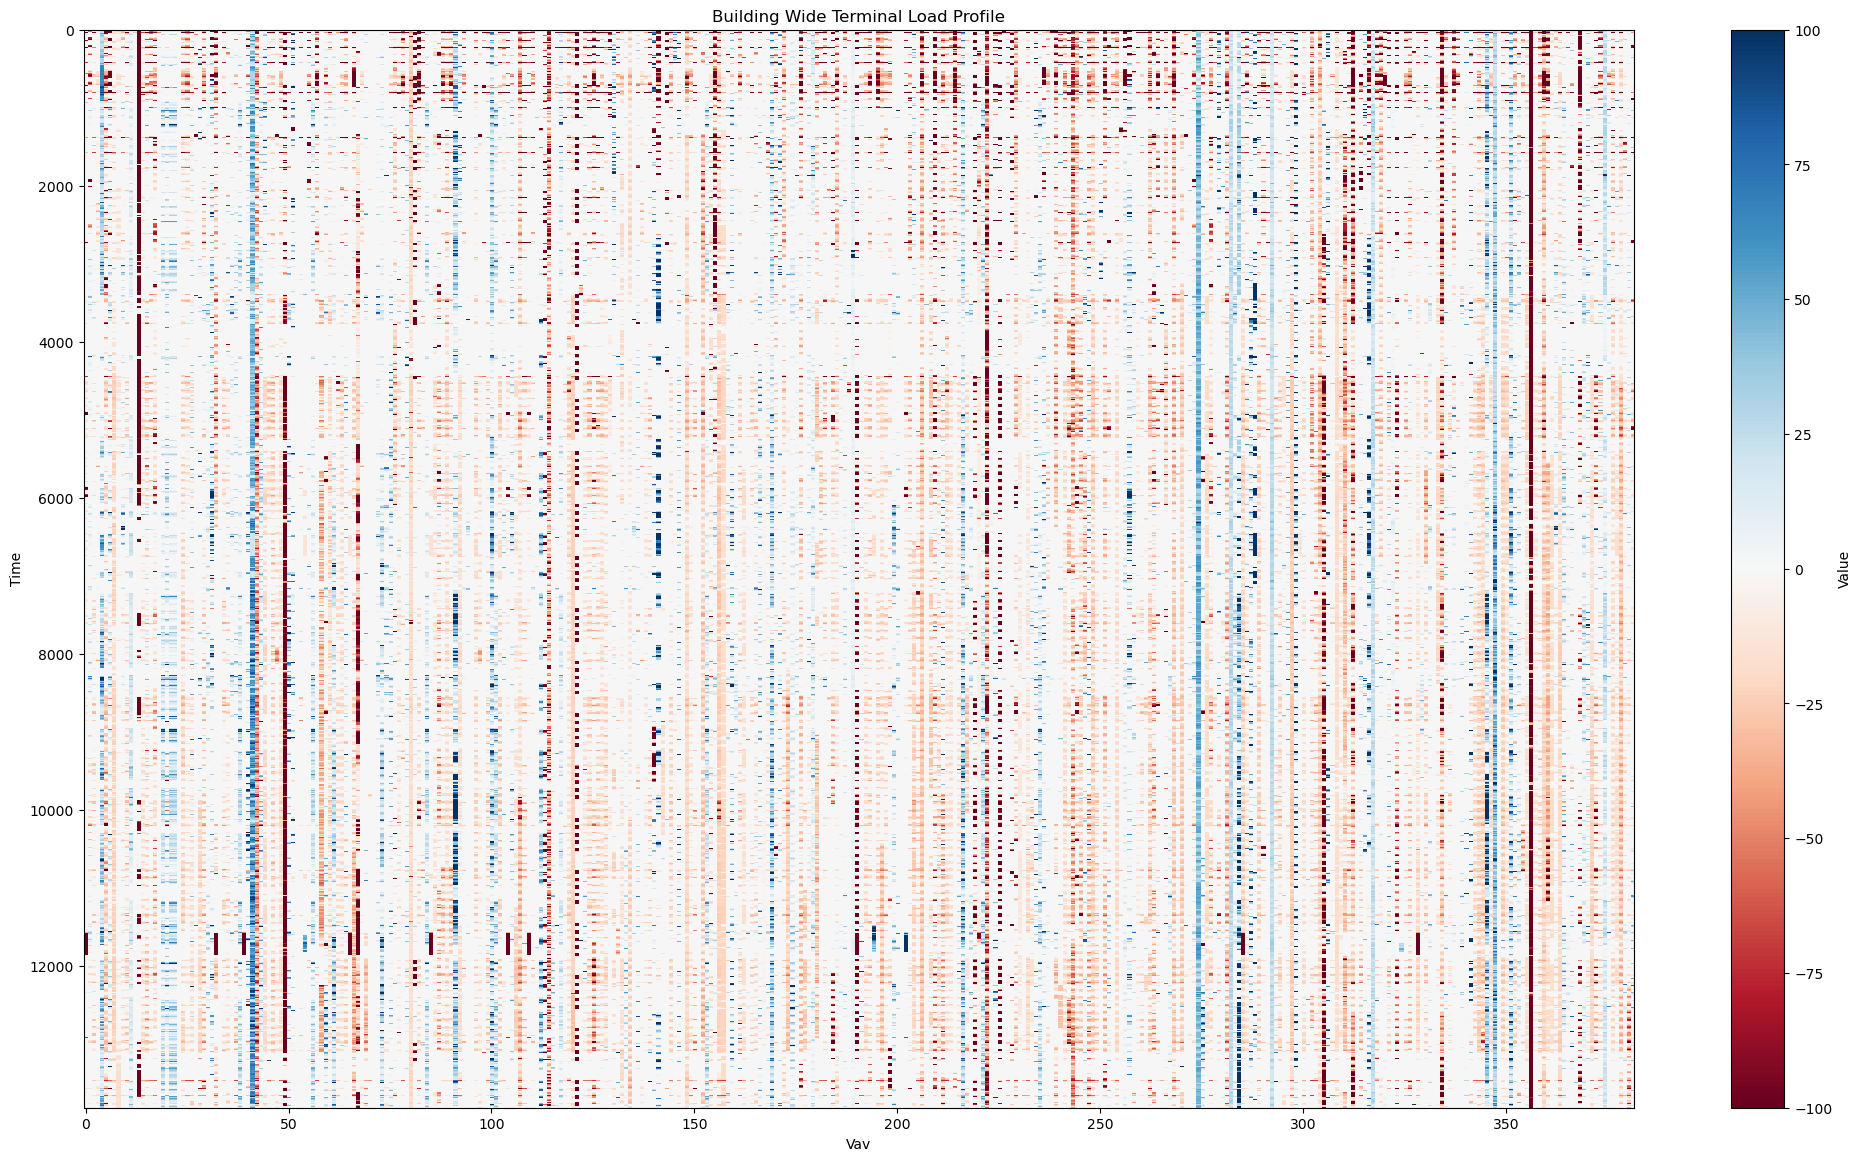

In [10]:
tload_viz(df)

We have time series for a given building, corresponding do each zone terminal load, a measure of how needy a zone i in term of cooling or reheat. 

We'll denote this:

$$T_{load}^{(z,t)}$$

With $t$ indexing the time and $z$ denoting the zone of the building. We have  382  zone in this building, which makes a vector of 
$$T_{load, building}^{t} \in \mathbb R ^{(382,1)}$$

We also have a input feature timeseries, which is common for all the building as well. This includes features such as Outside Air temperautre or solar irradiation. 

$$W^{t}$$

In the code the weather dataframe is formatted like so:
| Date                | temperature | RH  | Tdew | wind | sun_rad | daily_rain |
|---------------------|-------------|-----|------|------|---------|------------|
| 2023-05-01 00:00:00 | 52.6        | 75.0| 44.8 | 9.2  | 0.0     | 0.00       |
| 2023-05-01 01:00:00 | 52.4        | 75.0| 44.7 | 7.4  | 0.0     | 0.00       |
| 2023-05-01 02:00:00 | 52.2        | 75.0| 44.4 | 9.0  | 0.0     | 0.00       |

And the 

| Date                | VAV2-33 | VAV2-17   | VAV3-18 | VAV4-22    | VAV2-20 | VAV1-18 | VAV2-03   | VAV3-06 | VAV2-31 | VAV2-29 | ... | VAV2-11 | VAV2-32 | VAV4-25    | VAV4-08 | VAV1-02   | VAV0-00-4  | VAV0-04 | VAV1-12 | VAV2-18 | VAV3-15 |
|---------------------|---------|-----------|---------|------------|---------|---------|-----------|---------|---------|---------|-----|---------|---------|------------|---------|-----------|------------|---------|---------|---------|---------|
| 2023-05-01 00:00:00 | 0.0     | 0.000000  | 0.0     | -10.687083 | 0.0     | 0.0     | -5.494500 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.662916 | 0.0     | -0.435333 | -8.518917  | 0.0     | 0.0     | 0.0     | 0.000000|
| 2023-05-01 01:00:00 | 0.0     | -0.355917 | 0.0     | -10.881667 | 0.0     | 0.0     | -7.798417 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.492833 | 0.0     | -7.894917 | -7.576250  | 0.0     | 0.0     | 0.0     | 0.000000|
| 2023-05-01 02:00:00 | 0.0     | -0.559250 | 0.0     | -10.827083 | 0.0     | 0.0     | -6.123417 | 0.000000| 0.0     | -100.0  | ... | 0.0     | 0.0     | -16.670916 | 0.0     | -6.497750 | -8.176333  | 0.0     | 0.0     | 0.0     | -1.364750|

# Quick look at the data

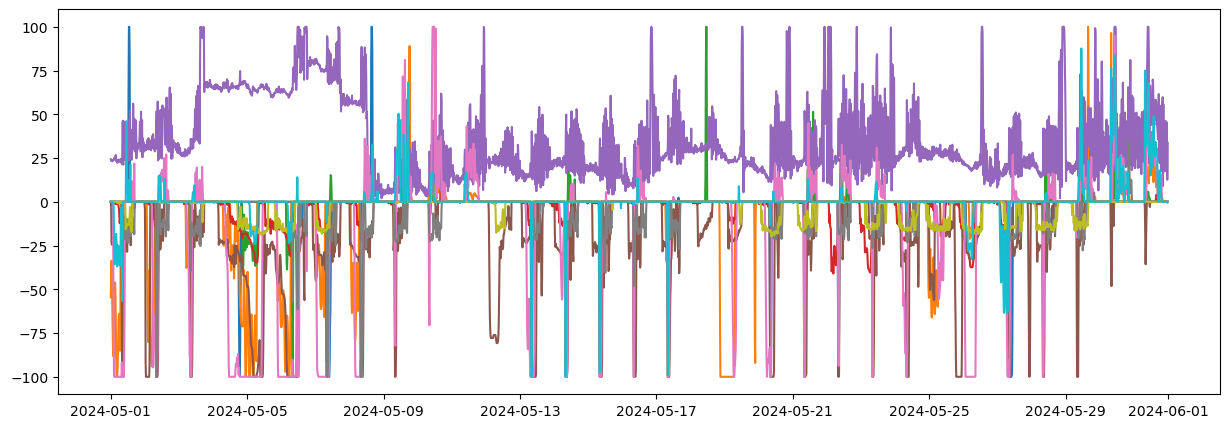

In [11]:
plt.figure(figsize=(15,5))
for col in df.columns[:10]:
    plt.plot(df.loc[df.index.month == 5,col], label=col)

# Hyperparameters choice

In [14]:
n_epochs = 200 

# Base model

In [15]:
from baseline import *

In [16]:
# Make sure both dataframes have datetime indices
df.index = pd.to_datetime(df.index)
weather.index = pd.to_datetime(weather.index)

# Train the model
model, train_losses, val_losses, train_dataset, val_dataset, train_loader, val_loader = get_baseline_model(df, weather, n_epochs=n_epochs,p_dropout=0.2)

Preparing BaselinePredictor model...
Checking data availability...
Terminal loads date range: 2024-04-29 00:00:00 to 2024-09-19 23:45:00
Weather data date range: 2024-04-29 00:00:00 to 2024-09-19 23:00:00

Using split date: 2024-08-21 00:00:00

Checking data sizes:
Training set hours: 10942
Validation set hours: 2880
Minimum required hours: 192

Creating datasets...
Created 106 valid sequences
First sequence shapes:
Past terminal load and weather: (168, 389)
Future weather: (24, 7)
Target loads: (24, 382)
Created 23 valid sequences
First sequence shapes:
Past terminal load and weather: (168, 389)
Future weather: (24, 7)
Target loads: (24, 382)

Creating dataloaders...

Initializing BaselinePredictor model...
BaselinePredictor model is ready.


In [19]:
from baseline import calculate_baseline_errors

In [69]:
import numpy as np
import torch
from sklearn.metrics import mean_squared_error

def calculate_rmse(model, val_loader, device):
    model.eval()
    all_predictions = []
    all_targets = []
    
    with torch.no_grad():
        for (input_loads_weather, input_weather), target_loads in val_loader:
            input_loads_weather = input_loads_weather.to(device)
            input_weather = input_weather.to(device)
            target_loads = target_loads.to(device)
            
            predictions = model(input_loads_weather, input_weather)
            all_predictions.append(predictions.cpu().numpy())
            all_targets.append(target_loads.cpu().numpy())
    
    all_predictions = np.concatenate(all_predictions, axis=0)
    all_targets = np.concatenate(all_targets, axis=0)
    
    # Reshape to 2D arrays if necessary
    all_predictions = all_predictions.reshape(all_predictions.shape[0], -1)
    all_targets = all_targets.reshape(all_targets.shape[0], -1)
    
    mse = mean_squared_error(all_targets, all_predictions)
    rmse = np.sqrt(mse)
    
    return rmse

# Assuming `model` is your trained model and `val_loader` is your validation DataLoader
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
rmse = calculate_rmse(model, val_loader, device)
print(f'RMSE on the validation set: {rmse:.4f}')

RMSE on the validation set: 1.0085


In [53]:
original_std = val_dataset.load_scaler.scale_[0]

# Convert the scaled RMSE to the original RMSE
original_rmse = rmse * original_std

In [56]:
original_rmse

34.05927191483989

# Saving the models

In [41]:
import torch
import pickle

# Example usage
from baseline import save_all
model_path = 'model/model_baseline.pth'
data_path = 'model/model_baseline.pkl'
save_all(model, train_losses, val_losses, train_dataset, val_dataset, train_loader, val_loader, model_path, data_path)